In [1]:
# Ignorar os avisos
import warnings
warnings.filterwarnings('always')  # Configurar para mostrar todos os avisos
warnings.filterwarnings('ignore')  # Ignorar os avisos

# Visualização e manipulação de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

# Configuração
style.use('fivethirtyeight')  # Estilo de plotagem
sns.set(style='whitegrid', color_codes=True)  # Configurações de estilo para Seaborn

# Importar algoritmos de modelagem necessários.

# Classificação.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Regressão
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Seleção de modelo
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Pré-processamento
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer  # Importar o SimpleImputer do módulo sklearn.impute

# Métricas de avaliação
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error  # para regressão
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # para classificação


In [2]:
df=pd.read_csv('analise_vinho_branco.csv')

In [3]:
df = df.iloc[:, 1:]

In [4]:
df.shape

(4898, 12)

In [5]:
df.columns 

Index(['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloreto', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            4898 non-null   float64
 1   acidez_volatil         4898 non-null   float64
 2   acido_citrico          4898 non-null   float64
 3   acucar_residual        4898 non-null   float64
 4   cloreto                4898 non-null   float64
 5   dioxido_enxofre_livre  4898 non-null   float64
 6   dioxido_enxofre_total  4898 non-null   float64
 7   densidade              4898 non-null   float64
 8   pH                     4898 non-null   float64
 9   sulfatos               4898 non-null   float64
 10  alcool                 4898 non-null   float64
 11  qualidade              4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df.isnull().sum()

acidez_fixa              0
acidez_volatil           0
acido_citrico            0
acucar_residual          0
cloreto                  0
dioxido_enxofre_livre    0
dioxido_enxofre_total    0
densidade                0
pH                       0
sulfatos                 0
alcool                   0
qualidade                0
dtype: int64

# Análise univariada

In [8]:
df.describe(include='all')

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloreto,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Os historiogramas são úteis para entender a distribuição de dados, identificar tendências, padrões e outliers em um conjunto de dados. 

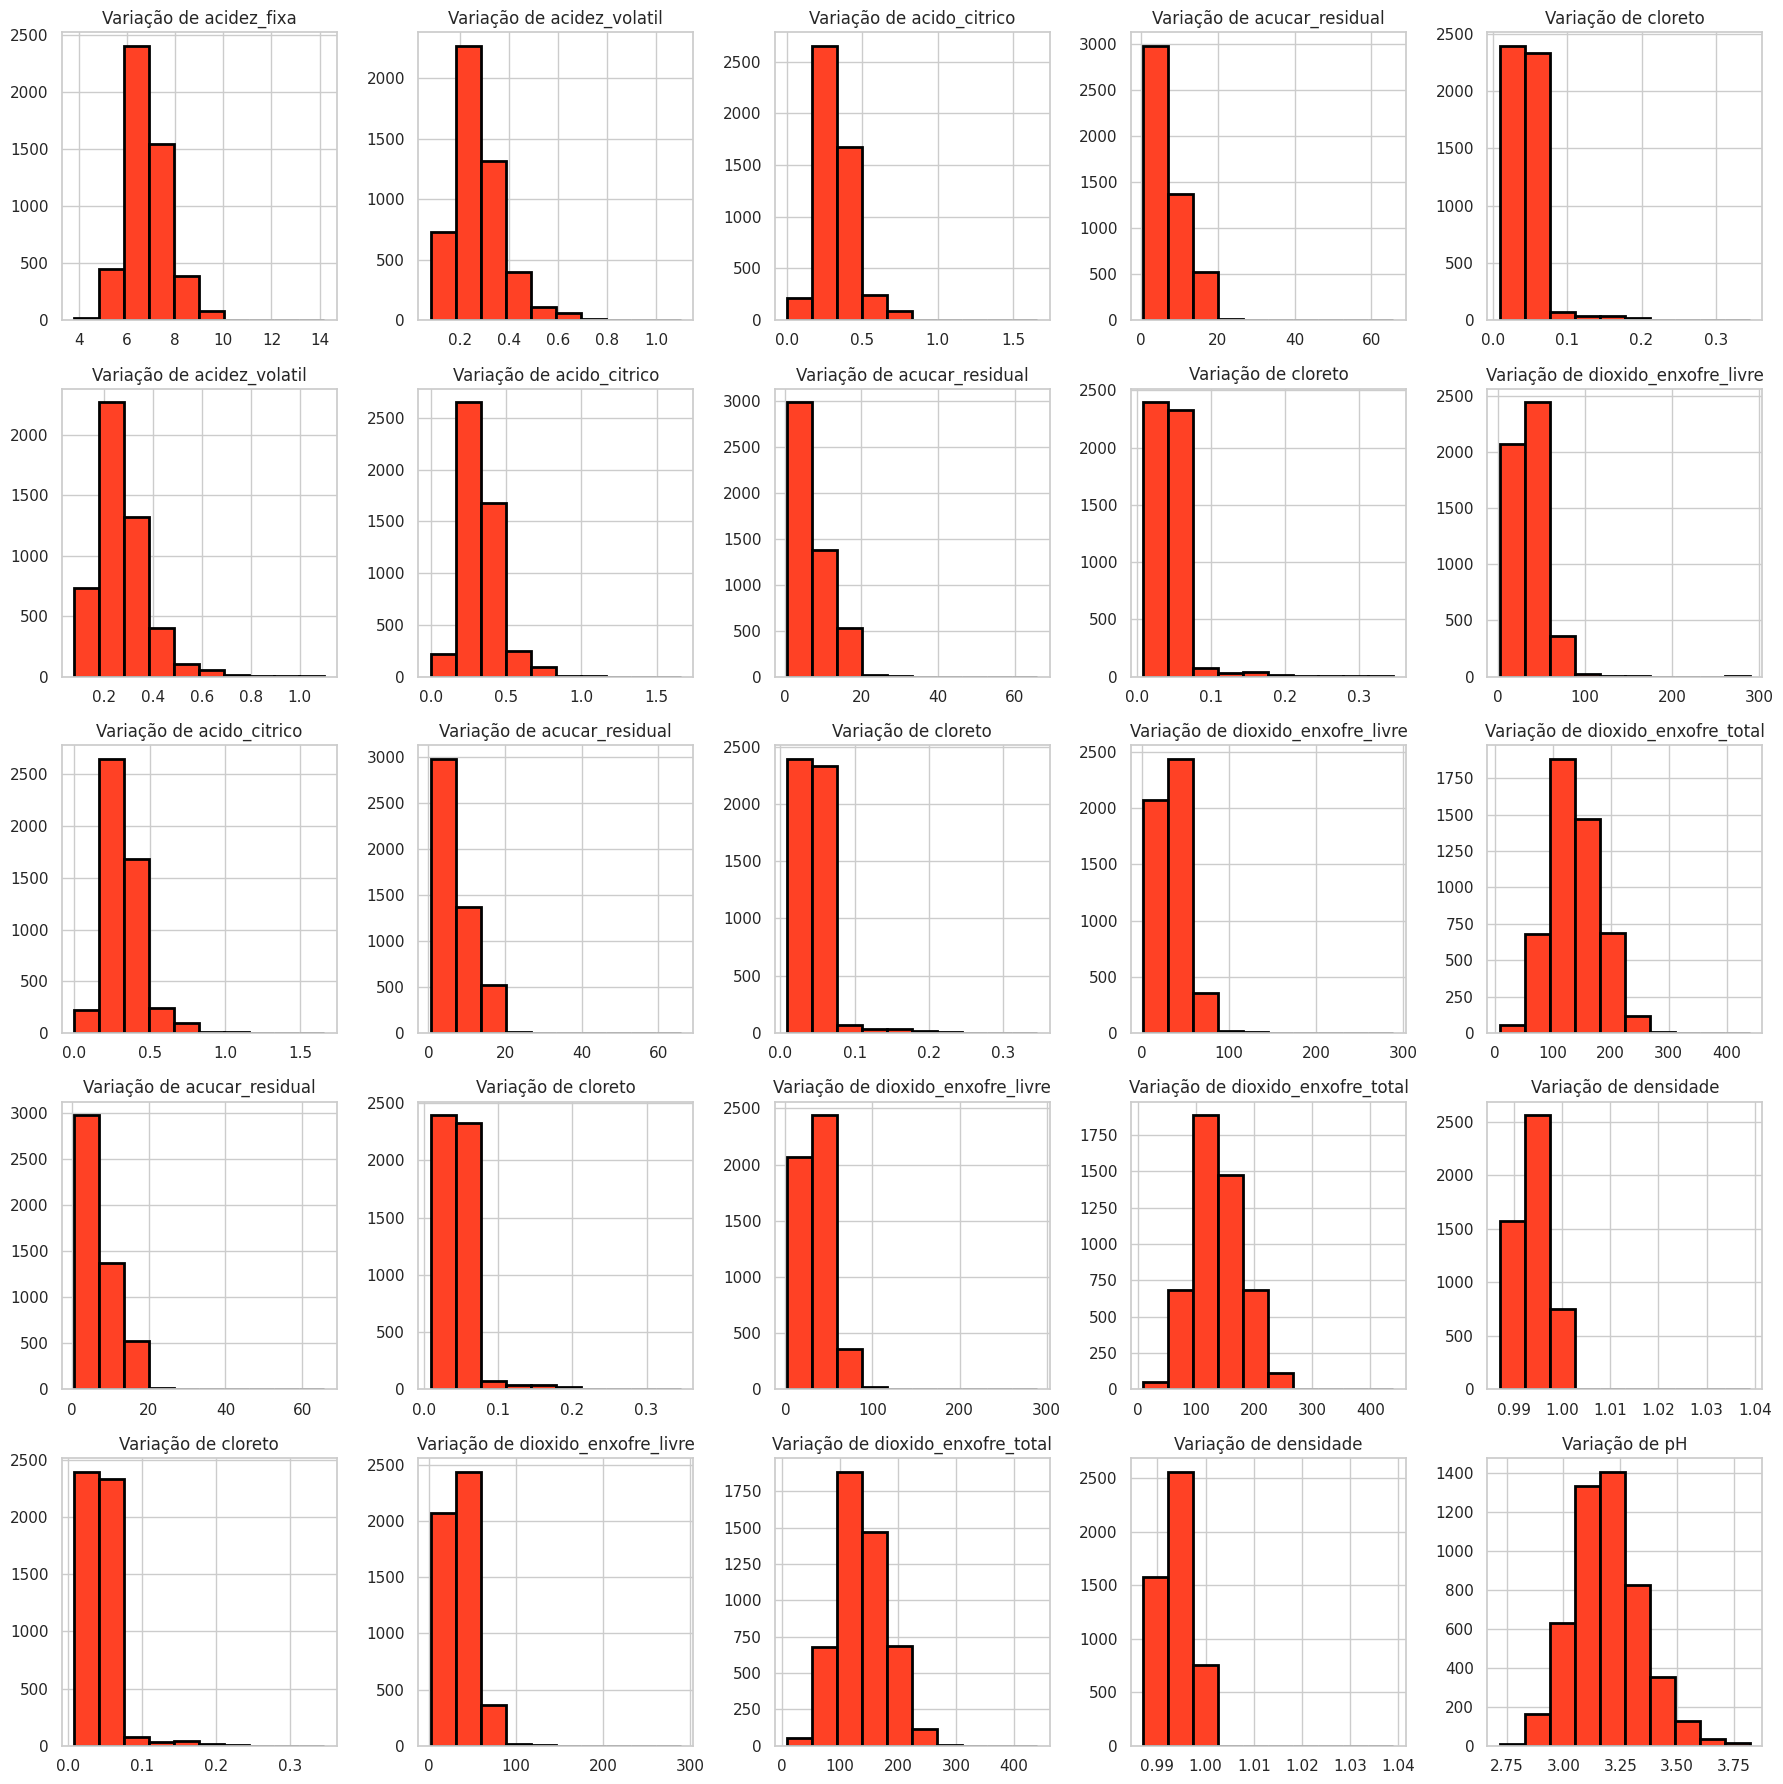

In [9]:
fig, axes = plt.subplots(5, 5)
colunas = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
           'cloreto', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
           'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade']
for i in range(5):
    for j in range(5):
        axes[i, j].hist(x=colunas[i + j], data=df,
                        edgecolor='#000000', linewidth=2, color='#ff4125')
        axes[i, j].set_title('Variação de ' + colunas[i + j])
fig = plt.gcf()
fig.set_size_inches(18, 18)
fig.tight_layout()


### Correlação entre diferentes características usando um mapa de correlação

<Axes: >

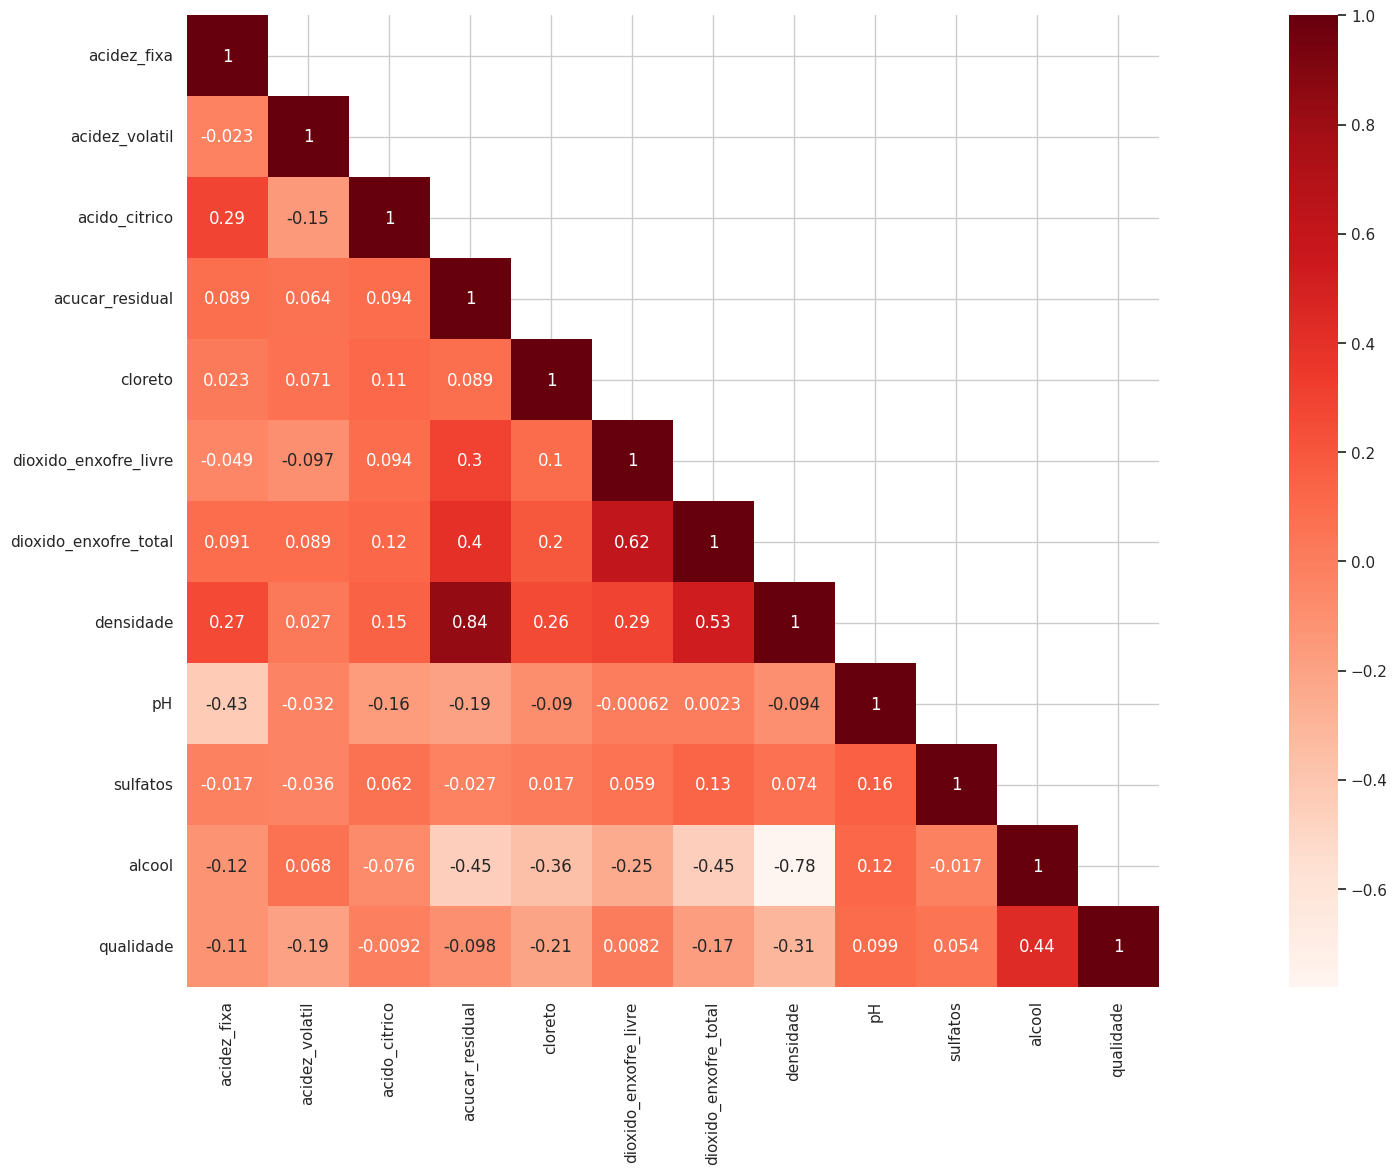

In [10]:
matriz_correlacao = df.corr()
mascara = np.array(matriz_correlacao)
mascara[np.tril_indices_from(mascara)] = False
figura = plt.gcf()
figura.set_size_inches(30, 12)

# Usar a paleta de cores "Reds" para criar um degradê de tons de vermelho
sns.heatmap(data=matriz_correlacao, mask=mascara, square=True, annot=True, cbar=True, cmap="Reds")


**INFERÊNCIAS DO MAPA DE CALOR ACIMA:**

1. A qualidade do vinho está altamente relacionada à acidez volátil.

2. Além disso, a qualidade do vinho está altamente correlacionada com o teor alcoólico.

3. O pH e o ácido cítrico/ acidez fixa estão altamente inversamente relacionados, pois todos sabemos que os ácidos têm valores de pH menores.

4. A relação consigo mesma (ou seja, de uma característica consigo mesma) é igual a 1, como esperado.

5. Outras inferências semelhantes podem ser feitas.

### Agora é possível visualizar a variação da qualidade em relação a distintos atributos numéricos.

#### A função cria e exibe três gráficos em uma única chamada, usando os parâmetros fornecidos. É útil quando desejar visualizar diferentes aspectos da relação entre duas variáveis em um conjunto de dados.

In [11]:
def plot(feature_x, target='qualidade'):
    sns.catplot(x=target, y=feature_x, data=df, kind='bar', height=5, aspect=1)
    sns.catplot(x=target, y=feature_x, data=df, kind='violin', height=5, aspect=1)
    sns.catplot(x=target, y=feature_x, data=df, kind='swarm', height=5, aspect=1)

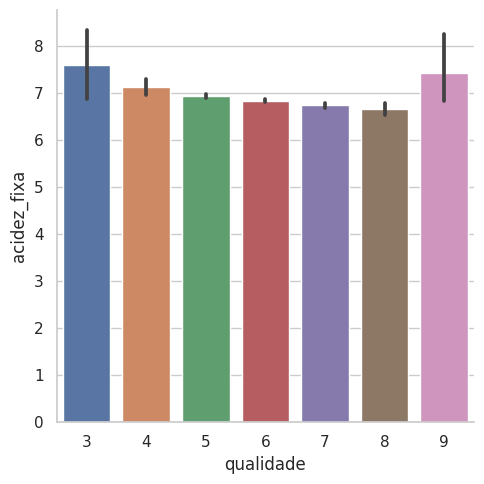

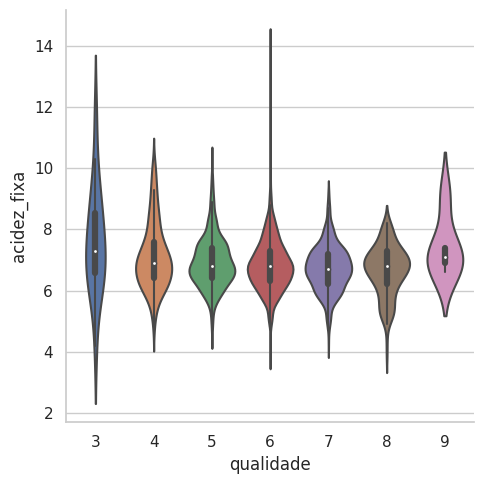

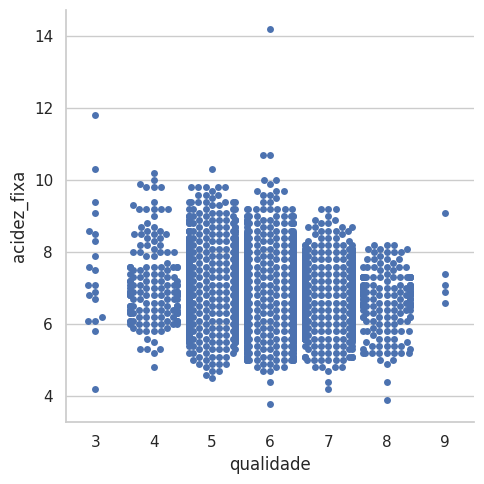

In [12]:
plot('acidez_fixa','qualidade')

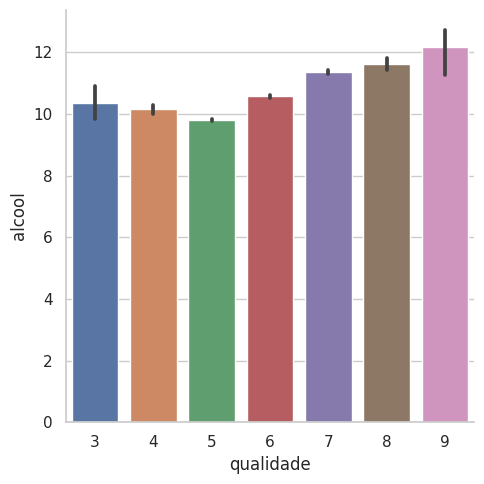

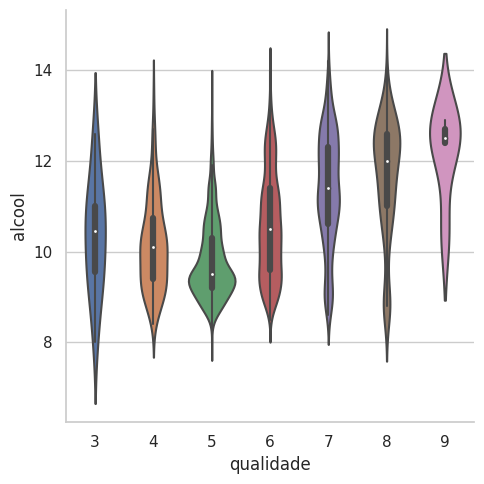

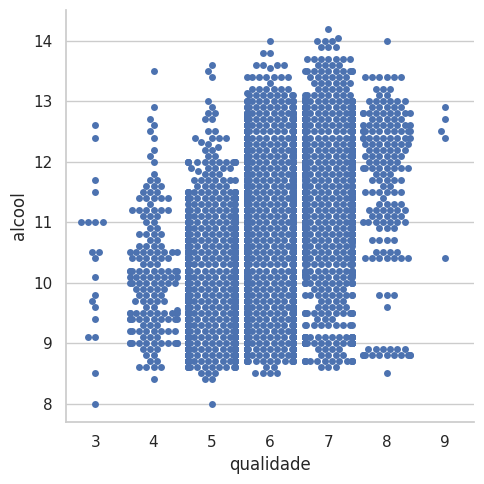

In [13]:
plot('alcool','qualidade')

## Preparação Concluída: Avançando para a Modelagem de Dados

In [14]:
intervalos = (2, 6.5, 8)
nomes_grupos = ['ruim', 'bom']
df['qualidade'] = pd.cut(df['qualidade'], bins=intervalos, labels=nomes_grupos)

In [15]:
# Cria uma instância do LabelEncoder
codificador_rotulos = LabelEncoder()

##### Uma explicação sucinta sobre o LabelEncoder: Esta classe, parte da biblioteca scikit-learn (sklearn), é amplamente empregada para converter rótulos (categorias) em variáveis categóricas em valores numéricos. Essa conversão é essencial ao treinar modelos de aprendizado de máquina que exigem entradas numéricas em vez de categóricas. Por exemplo, permite transformar rótulos de classes, como "ruim" e "bom", em valores 0 e 1, tornando-os adequados como entradas para modelos de machine learning.

In [16]:
# "Ruim" se torna 0 e "Bom" se torna 1
df['qualidade'] = codificador_rotulos.fit_transform(df['qualidade'])


**Divisão de Dados para Treinamento e Teste:**

Este código divide um conjunto de dados em duas partes: uma para treinar um modelo de machine learning (conjunto de treinamento) e outra para testar o modelo (conjunto de teste). Ele separa as características do conjunto de destino (rótulos) e permite avaliar o desempenho do modelo ao usar dados que não foram usados no treinamento.

In [17]:
x_treino, x_teste, y_treino, y_teste = train_test_split(df.drop('qualidade', axis=1), df['qualidade'], test_size=0.25, random_state=42)


## Comparação de Modelos de Classificação e Cálculo da Acurácia

In [18]:
# Lista de modelos de classificação
modelos = [LogisticRegression(), LinearSVC(), SVC(kernel='rbf'), KNeighborsClassifier(), RandomForestClassifier(),
           DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB()]


nomes_dos_modelos = ['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acuracias = []  # Lista para armazenar as acurácias dos modelos
resultados = {}  # Dicionário para armazenar os resultados

for i, modelo in enumerate(modelos):
    clf = modelo  # clf é uma abreviação comum para "classificador"
    clf.fit(x_treino, y_treino)  # Treina o classificador com os dados de treinamento
    previsoes = clf.predict(x_teste)  # Faz previsões com o conjunto de teste
    acuracia = accuracy_score(previsoes, y_teste)  # Calcula a acurácia das previsões
    acuracias.append(acuracia)  # Adiciona a acurácia à lista de acurácias

# Preenche o dicionário de resultados com os nomes dos modelos e suas acurácias correspondentes
resultados['Algoritmo de Modelagem'] = nomes_dos_modelos
resultados['Acurácia'] = acuracias

resultados  # Retorna o dicionário de resultados


{'Algoritmo de Modelagem': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Acurácia': [0.7869387755102041,
  0.5681632653061225,
  0.7681632653061224,
  0.7771428571428571,
  0.8865306122448979,
  0.8408163265306122,
  0.8277551020408164,
  0.7151020408163266]}

In [19]:
acuracias_frame = pd.DataFrame(resultados)
acuracias_frame

,Algoritmo de Modelagem,Acurácia
0,LogisticRegression,0.786939
1,LinearSVM,0.568163
2,rbfSVM,0.768163
3,KNearestNeighbors,0.777143
4,RandomForestClassifier,0.886531
5,DecisionTree,0.840816
6,GradientBoostingClassifier,0.827755
7,GaussianNB,0.715102


<Axes: xlabel='Acurácia', ylabel='Algoritmo de Modelagem'>

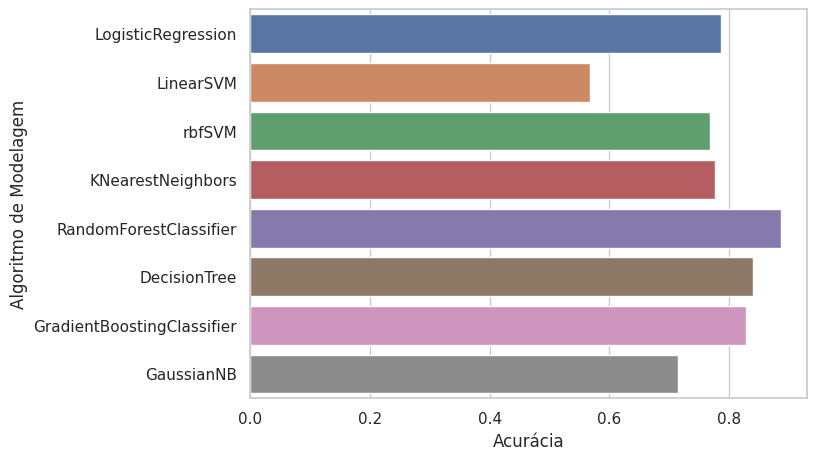

In [20]:
sns.barplot(y='Algoritmo de Modelagem',x='Acurácia',data=acuracias_frame)

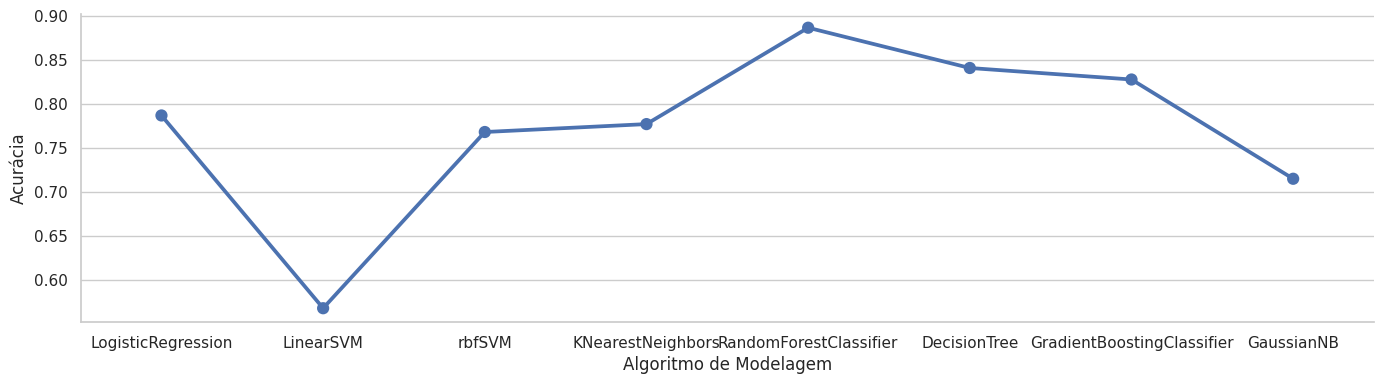

In [21]:
sns.catplot(x='Algoritmo de Modelagem',y='Acurácia',data=acuracias_frame, kind='point', height=4, aspect=3.5)

No contexto da análise de dados, é importante notar que, inicialmente, as características não foram submetidas a nenhum tipo de escala. Isso significa que essas características têm diferentes escalas, o que implica que seus valores estão em intervalos ou unidades distintas. Agora, com o objetivo de entender melhor o impacto disso, a próxima etapa é realizar a escala das características. O escalonamento de características é uma prática comum em ciência de dados, utilizada para padronizar as características em uma escala uniforme. Essa ação visa avaliar como essa padronização afeta os resultados e o desempenho do modelo ou da análise em questão.

In [22]:
def avaliar_modelos(x_treino, x_teste, y_treino, y_teste, nome_escalonador):
    # Lista de modelos a serem avaliados
    modelos = [LogisticRegression(), LinearSVC(), SVC(kernel='rbf'), KNeighborsClassifier(),
               RandomForestClassifier(), DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB()]

    resultados_acuracia = []

    # Avaliar cada modelo
    for modelo in modelos:
        clf = modelo
        clf.fit(x_treino, y_treino)
        previsoes = clf.predict(x_teste)
        resultados_acuracia.append(accuracy_score(previsoes, y_teste))

    # Armazenar os resultados no dataframe
    acuracias_frame[nome_escalonador] = np.array(resultados_acuracia)


In [23]:
# Extrair o array de labels 'qualidade' do DataFrame
Y = df['qualidade'].to_numpy()

# Lista de escaladores a serem aplicados aos dados
escaladores = [MinMaxScaler(), StandardScaler()]

# Nomes descritivos para os resultados dos escaladores
nomes_escalonadores = ['Acuracia_Min_Max_Scaler', 'Acuracia_Standard_Scaler']

# Iterar através dos escaladores e avaliar os modelos
for escala in range(len(escaladores)):
    escalador = escaladores[escala]

    # Aplicar o escalador aos dados
    escalador.fit(df)
    df_escalado = escalador.transform(df)

    # Selecionar as características escaladas (primeiras 11 colunas)
    X = df_escalado[:, 0:11]

    # Reatribuir Y com os rótulos de 'qualidade'
    Y = df['qualidade'].to_numpy()

    # Dividir os dados em treino e teste
    x_treino, x_teste, y_treino, y_teste = train_test_split(
        X, Y, test_size=0.25, random_state=42)

    # Avaliar os modelos com o nome do escalador correspondente
    avaliar_modelos(x_treino, x_teste, y_treino,
                    y_teste, nomes_escalonadores[escala])


## Técnicas de Escalonamento no Desempenho de Modelos de Classificação

O código tem o objetivo de avaliar como diferentes técnicas de escalonamento afetam o desempenho de modelos de classificação em um conjunto de dados específico. Utilizando a função `avaliar_modelos`, o código examina vários modelos de classificação em dados de treinamento e teste, fornecendo resultados que permitem a comparação do desempenho desses modelos após a aplicação de técnicas de escalonamento, como Min-Max Scaling e Standard Scaling. Esse processo é fundamental para determinar qual abordagem de pré-processamento de dados é mais eficaz na otimização do desempenho dos modelos, desempenhando um papel crucial no desenvolvimento de soluções de machine learning de sucesso.

In [24]:
acuracias_frame

,Algoritmo de Modelagem,Acurácia,Acuracia_Min_Max_Scaler,Acuracia_Standard_Scaler
0,LogisticRegression,0.786939,0.785306,0.786939
1,LinearSVM,0.568163,0.787755,0.794286
2,rbfSVM,0.768163,0.806531,0.819592
3,KNearestNeighbors,0.777143,0.828571,0.839184
4,RandomForestClassifier,0.886531,0.888163,0.893061
5,DecisionTree,0.840816,0.843265,0.840816
6,GradientBoostingClassifier,0.827755,0.827755,0.827755
7,GaussianNB,0.715102,0.713469,0.713469


Neste momento, apresenta-se de forma clara as precisões de diferentes algoritmos de modelagem ao utilizar diferentes escaladores.

1. É importante notar que, neste contexto, as precisões aumentam marginalmente ao realizar o escalonamento.

2. Adicionalmente, para esses dados, o StandardScaling parece proporcionar resultados ligeiramente superiores em comparação com o MinMaxScaling.

3. Para alguns algoritmos de modelagem, observa-se um aumento significativo nas precisões ao escalonar as características, como SVM e KNN, enquanto, para outros, não se observa um aumento considerável nas precisões ao realizar o escalonamento.

<Axes: xlabel='Acurácia', ylabel='Algoritmo de Modelagem'>

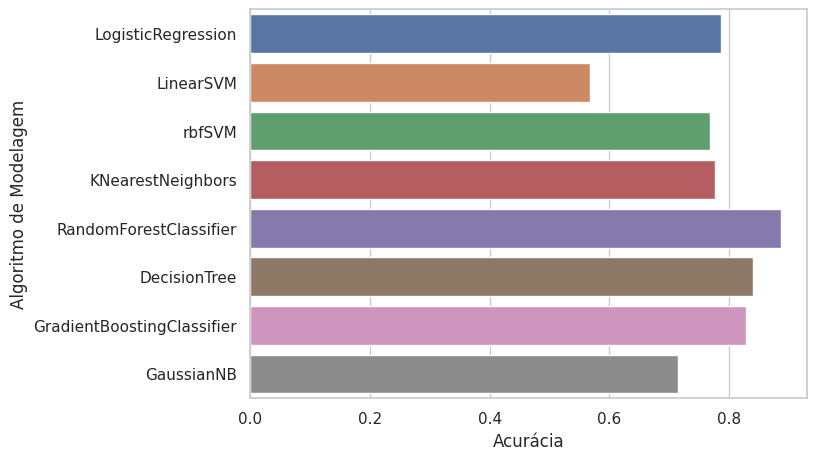

In [25]:
# código cria um gráfico de barras que ajuda a comparar a precisão de vários algoritmos de modelagem

sns.barplot(y='Algoritmo de Modelagem',x='Acurácia',data=acuracias_frame)

<Axes: xlabel='Acuracia_Min_Max_Scaler', ylabel='Algoritmo de Modelagem'>

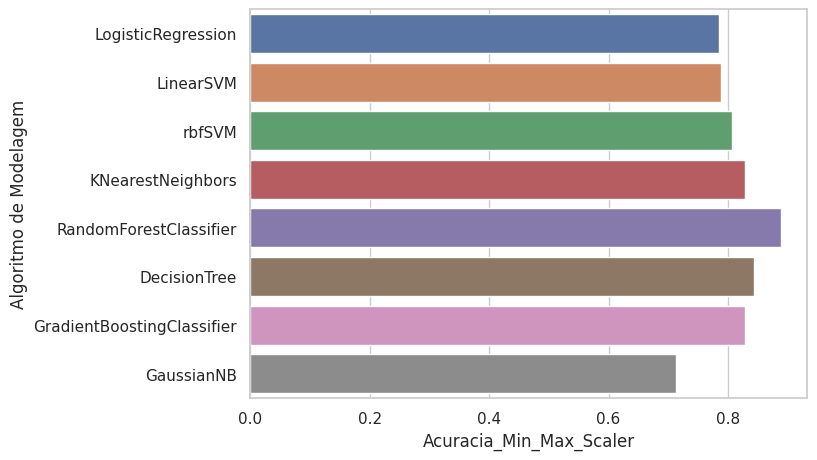

In [26]:
sns.barplot(y='Algoritmo de Modelagem',x='Acuracia_Min_Max_Scaler',data=acuracias_frame)

<Axes: xlabel='Acuracia_Standard_Scaler', ylabel='Algoritmo de Modelagem'>

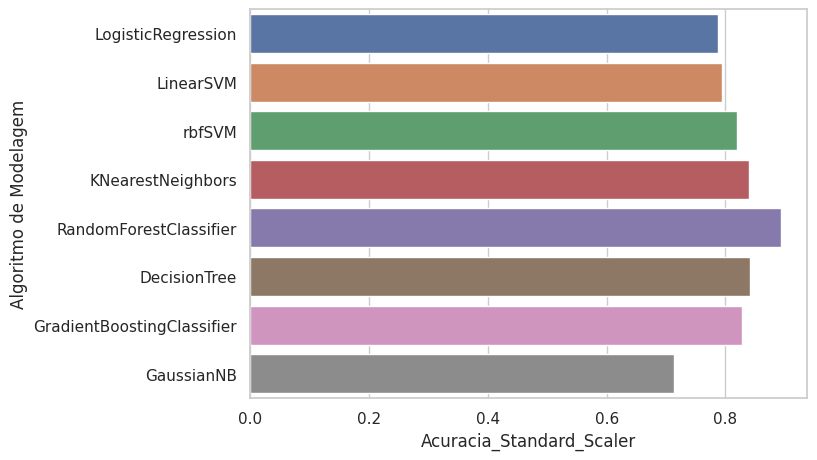

In [27]:
sns.barplot(y='Algoritmo de Modelagem',x='Acuracia_Standard_Scaler',data=acuracias_frame)

In [28]:
# Extrai a coluna 'qualidade' como o alvo (variável de saída) Y e converte-a em um array NumPy.
Y = df['qualidade'].to_numpy()

# Prepara as features (variáveis de entrada) utilizando um StandardScaler para padronização dos dados, uma vez que isso produziu resultados melhores no passado.
escalador = StandardScaler()
df_escalado = escalador.fit_transform(df)
X = df_escalado[:, 0:11]  # Seleciona as colunas de 0 a 10 como as features padronizadas.

# Reatribui Y para garantir que estamos usando a variável alvo correta.
Y = df['qualidade'].to_numpy()

# Divide os dados em conjuntos de treinamento e teste usando a função train_test_split.
# 75% dos dados serão usados para treinamento (x_treino, y_treino) e 25% para teste (x_teste, y_teste).
# O valor de random_state é definido como 42 para garantir a reprodutibilidade dos resultados.
x_treino, x_teste, y_treino, y_teste, = train_test_split(X, Y, test_size=0.25, random_state=42)


## Ajuste de parâmetros

###### 1.   LOGISTIC REGRESSION.

In [29]:
# Definindo uma lista de valores para os hiperparâmetros C e penalty
parametros_lr = {'C': [0.001, 0.01, 0.1, 1,
                    10, 100, 1000], 'penalty': ['l1', 'l2']}

# Criando um estimador de Regressão Logística para otimização de hiperparâmetros
classificador_lr = GridSearchCV(estimator=LogisticRegression(),
                      param_grid=parametros_lr, scoring='accuracy', cv=10)

# Ajustando (treinando) o modelo com os dados de treinamento x_treino e y_treino
classificador_lr.fit(x_treino, y_treino)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [30]:
# Obtém os melhores hiperparâmetros encontrados durante a otimização.
classificador_lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [31]:
# Obtém a melhor pontuação (geralmente acurácia) alcançada com os melhores hiperparâmetros.
classificador_lr.best_score_


0.8083335801445326

In [32]:
# Acessa os resultados completos da validação cruzada, incluindo as métricas para cada combinação de hiperparâmetros.
classificador_lr.cv_results_

{'mean_fit_time': array([0.00055771, 0.01514037, 0.0002686 , 0.01373191, 0.00026629,
        0.02212462, 0.00029042, 0.0417877 , 0.00043879, 0.04112799,
        0.00028489, 0.03985231, 0.00027413, 0.04531057]),
 'std_fit_time': array([8.42131952e-05, 3.55533308e-03, 2.80551307e-05, 1.06613635e-03,
        6.77526246e-05, 2.01256673e-03, 1.33509314e-04, 2.54038697e-03,
        1.48606061e-04, 2.39407519e-03, 7.49549830e-05, 1.01209708e-03,
        8.88510140e-05, 6.42346325e-03]),
 'mean_score_time': array([0.        , 0.00105674, 0.        , 0.0008312 , 0.        ,
        0.00086298, 0.        , 0.0007762 , 0.        , 0.00069366,
        0.        , 0.00070176, 0.        , 0.00078385]),
 'std_score_time': array([0.00000000e+00, 3.98735427e-04, 0.00000000e+00, 1.64136259e-04,
        0.00000000e+00, 2.19899550e-04, 0.00000000e+00, 2.92470437e-04,
        0.00000000e+00, 8.52263687e-05, 0.00000000e+00, 2.66035527e-04,
        0.00000000e+00, 8.92936656e-05]),
 'param_C': masked_array(d

In [33]:
# Faz previsões com o modelo otimizado nos dados de teste.
previsoes = classificador_lr.predict(x_teste)

# Calcula a acurácia das previsões comparando com os valores reais nos dados de teste.
accuracy_score(previsoes, y_teste)

0.7877551020408163

######   2. KNN.

In [34]:
# Cria uma lista de valores para o número de vizinhos
lista_vizinhos = [i + 1 for i in range(50)]

# Define um dicionário de parâmetros para o KNeighborsClassifier
parametros_knn = {'n_neighbors': lista_vizinhos, 'n_jobs': [-1]}

# Cria um classificador KNeighborsClassifier com busca em grade
classificador_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn, scoring='accuracy', cv=10)

# Treina o classificador com os dados de treinamento
classificador_knn.fit(x_treino,y_treino)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [35]:
classificador_knn.best_score_

0.838831299609051

In [36]:
classificador_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 1}

In [37]:
classificador_knn.cv_results_

{'mean_fit_time': array([0.00491922, 0.0040874 , 0.00392809, 0.003578  , 0.00421922,
        0.00381348, 0.00422246, 0.00447288, 0.00463307, 0.00453279,
        0.00455668, 0.00459964, 0.00492504, 0.00480092, 0.0046515 ,
        0.00468428, 0.00443823, 0.00501928, 0.00431364, 0.00550213,
        0.00450847, 0.00514171, 0.00455141, 0.00499334, 0.00400817,
        0.00388525, 0.00404077, 0.00399027, 0.00356202, 0.00432563,
        0.00361142, 0.00444486, 0.00472848, 0.0046886 , 0.00536268,
        0.00519841, 0.00531485, 0.0046793 , 0.0043359 , 0.00464048,
        0.00415866, 0.00483971, 0.00510364, 0.00362546, 0.0046349 ,
        0.00442741, 0.00491903, 0.00421693, 0.00514197, 0.00517049]),
 'std_fit_time': array([0.00101118, 0.00116188, 0.00104725, 0.0007026 , 0.00119579,
        0.00057216, 0.00081577, 0.00117342, 0.00138471, 0.0006632 ,
        0.00060293, 0.00049354, 0.00150891, 0.00081992, 0.00066462,
        0.00083816, 0.00123894, 0.00085228, 0.00153092, 0.00124808,
        0.000

In [38]:
# Faz previsões com o modelo otimizado nos dados de teste.
previsoes = classificador_knn.predict(x_teste)

# Calcula a acurácia das previsões comparando com os valores reais nos dados de teste.
accuracy_score(previsoes, y_teste)

0.8595918367346939

###### *. SUPPORT VECTOR MACHINE (SVM)

Achei bem negativo a duração do processo, cerca de 20m de execução

######   3. RANDOM FOREST.

In [39]:
# Definição dos parâmetros para o Random Forest
parametros_rf = {'n_estimators': [500],  # Número de árvores na floresta
                 'max_features': ['auto', 'sqrt', 'log2']}  # Método de seleção de características

# Criação do classificador Random Forest com Grid Search Cross-Validation
classificador_rf = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                param_grid=parametros_rf,  # Parâmetros a serem ajustados
                                scoring='accuracy',  # Métrica de avaliação
                                cv=10)  # Validação cruzada com 10 folds

# Treinamento do classificador Random Forest
classificador_rf.fit(x_treino, y_treino)  # Dados de treinamento


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500]},
             scoring='accuracy')

In [40]:
classificador_rf.best_score_

0.871212682146665

In [41]:
classificador_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [42]:
classificador_rf.cv_results_

{'mean_fit_time': array([3.54623795e-04, 1.37128808e+00, 1.64274788e+00]),
 'std_fit_time': array([8.92406315e-05, 2.21986069e-01, 2.04944555e-01]),
 'mean_score_time': array([0.        , 0.1167187 , 0.13630059]),
 'std_score_time': array([0.        , 0.01160293, 0.02246914]),
 'param_max_features': masked_array(data=['auto', 'sqrt', 'log2'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500, 500, 500],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'auto', 'n_estimators': 500},
  {'max_features': 'sqrt', 'n_estimators': 500},
  {'max_features': 'log2', 'n_estimators': 500}],
 'split0_test_score': array([       nan, 0.86141304, 0.85869565]),
 'split1_test_score': array([       nan, 0.89673913, 0.88586957]),
 'split2_test_score': array([       nan, 0.89130435, 0.89945652]),
 'split3_test_score': array([       nan, 0.8692098

In [43]:
previsoes = classificador_rf.predict(x_teste)
accuracy_score(previsoes,y_teste)

0.8873469387755102

###### 4. GRADIENT BOOSTING.

In [44]:
# Inicializando o classificador Gradient Boosting com GridSearchCV.
classificador_gb = GridSearchCV(estimator=GradientBoostingClassifier(
), cv=10, param_grid={'n_estimators': [500]})

# Treinando o classificador Gradient Boosting com os dados de treinamento.
classificador_gb.fit(x_treino, y_treino)


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [45]:
classificador_gb.best_score_

0.8527025826323895

In [46]:
classificador_gb.best_params_

{'n_estimators': 500}

In [47]:
classificador_gb.cv_results_

{'mean_fit_time': array([8.03190596]),
 'std_fit_time': array([0.21502566]),
 'mean_score_time': array([0.00656943]),
 'std_score_time': array([0.00053771]),
 'param_n_estimators': masked_array(data=[500],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 500}],
 'split0_test_score': array([0.83423913]),
 'split1_test_score': array([0.88043478]),
 'split2_test_score': array([0.86684783]),
 'split3_test_score': array([0.86648501]),
 'split4_test_score': array([0.85831063]),
 'split5_test_score': array([0.85013624]),
 'split6_test_score': array([0.83106267]),
 'split7_test_score': array([0.86648501]),
 'split8_test_score': array([0.8119891]),
 'split9_test_score': array([0.86103542]),
 'mean_test_score': array([0.85270258]),
 'std_test_score': array([0.01980737]),
 'rank_test_score': array([1], dtype=int32)}

In [48]:
previsoes = classificador_gb.predict(x_teste)
accuracy_score(previsoes,y_teste)

0.8636734693877551